In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

# Data Overview

In [9]:
# Load dataset
data = pd.read_csv("../data/student_depression_dataset.csv")
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [11]:
data.shape

(27901, 18)

# Preprocessing

## Column renaming

In [12]:
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_', regex=False)
    .str.replace('?', '', regex=False)
)

In [13]:
print(data.columns.tolist())

['id', 'gender', 'age', 'city', 'profession', 'academic_pressure', 'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction', 'sleep_duration', 'dietary_habits', 'degree', 'have_you_ever_had_suicidal_thoughts_', 'work/study_hours', 'financial_stress', 'family_history_of_mental_illness', 'depression']


In [14]:
data.rename(columns={'have_you_ever_had_suicidal_thoughts_': 'suicidal_thoughts' ,'family_history_of_mental_illness' : 'illness_history' }, inplace=True)

## checking for unique values in every column

In [15]:
for col in data.columns:
    print(f"{col}: {data[col].unique()}")

id: [     2      8     26 ... 140689 140690 140699]
gender: ['Male' 'Female']
age: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
city: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']
profession: ['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
academic_pressure: [5. 2. 3. 4. 1. 0.]


## removing extra quotes

In [16]:
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.strip("'").str.strip()


In [17]:
for col in data.columns:
    print(f"{col}: {data[col].unique()}")

id: [     2      8     26 ... 140689 140690 140699]
gender: ['Male' 'Female']
age: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
city: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
profession: ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
academic_pressure: [5. 2. 3. 4. 1. 0.]
work_pressure:

## Sleep duration

## sleep duration mapping

In [18]:
print(data['sleep_duration'].unique())


['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']


In [19]:
sleep_map = {
    "Less than 5 hours": 0,
    "5-6 hours": 1,
    "7-8 hours": 2,
    "More than 8 hours": 3,
    "Others": 4
}

data['sleep_duration'] = data['sleep_duration'].map(sleep_map)




In [20]:
print(sorted(data['sleep_duration'].unique()))

[0, 1, 2, 3, 4]


## Binary mapping

In [21]:
binary_map = {'Yes': 1, 'No': 0}
data['suicidal_thoughts'] = data['suicidal_thoughts'].map(binary_map)
data['illness_history'] = data['illness_history'].map(binary_map)

In [22]:
print(data['suicidal_thoughts'].unique())

[1 0]


In [23]:
print(data['illness_history'].unique())

[0 1]


In [24]:
unmapped_values = data[data['sleep_duration'].isna()]
print(unmapped_values)
unmapped_values = data[data['suicidal_thoughts'].isna()]
print(unmapped_values)
unmapped_values = data[data['illness_history'].isna()]
print(unmapped_values)

Empty DataFrame
Columns: [id, gender, age, city, profession, academic_pressure, work_pressure, cgpa, study_satisfaction, job_satisfaction, sleep_duration, dietary_habits, degree, suicidal_thoughts, work/study_hours, financial_stress, illness_history, depression]
Index: []
Empty DataFrame
Columns: [id, gender, age, city, profession, academic_pressure, work_pressure, cgpa, study_satisfaction, job_satisfaction, sleep_duration, dietary_habits, degree, suicidal_thoughts, work/study_hours, financial_stress, illness_history, depression]
Index: []
Empty DataFrame
Columns: [id, gender, age, city, profession, academic_pressure, work_pressure, cgpa, study_satisfaction, job_satisfaction, sleep_duration, dietary_habits, degree, suicidal_thoughts, work/study_hours, financial_stress, illness_history, depression]
Index: []


In [25]:
data.head()

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work/study_hours,financial_stress,illness_history,depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,1,Healthy,B.Pharm,1,3.0,1.0,0,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,1,Moderate,BSc,0,3.0,2.0,1,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,0,Healthy,BA,0,9.0,1.0,1,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,2,Moderate,BCA,1,4.0,5.0,1,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,1,Moderate,M.Tech,1,1.0,1.0,0,0


## Label Encoding for categorical features

In [26]:
for col in ['gender', 'dietary_habits', 'degree']:
    data[col] = LabelEncoder().fit_transform(data[col])
#It encodes some text columns into numbers using LabelEncoder    

In [27]:
data.head()

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work/study_hours,financial_stress,illness_history,depression
0,2,1,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,1,0,3,1,3.0,1.0,0,1
1,8,0,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,1,1,10,0,3.0,2.0,1,0
2,26,1,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,0,0,5,0,9.0,1.0,1,0
3,30,0,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,2,1,7,1,4.0,5.0,1,1
4,32,0,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,1,1,17,1,1.0,1.0,0,0


## Drop unneeded columns

In [28]:
data.drop(['id', 'city', 'profession'], axis=1, inplace=True)

In [29]:
data.head()

,gender,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work/study_hours,financial_stress,illness_history,depression
0,1,33.0,5.0,0.0,8.97,2.0,0.0,1,0,3,1,3.0,1.0,0,1
1,0,24.0,2.0,0.0,5.90,5.0,0.0,1,1,10,0,3.0,2.0,1,0
2,1,31.0,3.0,0.0,7.03,5.0,0.0,0,0,5,0,9.0,1.0,1,0
3,0,28.0,3.0,0.0,5.59,2.0,0.0,2,1,7,1,4.0,5.0,1,1
4,0,25.0,4.0,0.0,8.13,3.0,0.0,1,1,17,1,1.0,1.0,0,0


## Numerical columns treatment

In [30]:
num_cols = ['age', 'academic_pressure', 'work_pressure', 'cgpa',
            'study_satisfaction', 'job_satisfaction', 'work/study_hours', 'financial_stress']

In [31]:
for col in num_cols:
    data[col] = data[col].replace('?', np.nan)  # Replace ? with NaN
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Ensure float dtype


In [32]:
for col in num_cols:
    print(f"{col}: {data[col].unique()}")

age: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
academic_pressure: [5. 2. 3. 4. 1. 0.]
work_pressure: [0. 5. 2.]
cgpa: [ 8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04    9.79
  8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25    7.83
  9.93    8.74    6.73    5.57    8.59    7.1     6.08    5.74    9.86
  6.7     6.21    5.87    6.37    9.72    5.88    9.56    6.99    5.24
  9.21    7.85    6.95    5.86    7.92    9.66    8.94    9.71    7.87
  5.6     7.9     5.46    6.79    8.7     7.38    8.5     7.09    9.82
  8.89    7.94    9.11    6.75    7.53    9.49    9.01    7.64    5.27
  6.      9.44    5.75    7.51    9.05    6.38    8.95    9.88    5.32
  6.27    7.7     8.1     9.59    8.96    5.51    7.43    8.79    9.95
  5.37    6.86    8.32    9.74    5.66    7.48    8.23    8.81    6.03
  5.56    5.68    5.14    7.61    6.17    8.17    9.87    8.75    6.16
  9.

In [33]:
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

## Categorical features treatment

In [34]:
#Which columns are still non-numeric (categorical)?
data.select_dtypes(include='object').columns

Index([], dtype='object')

In [35]:
for col in data.columns:
    print(f"{col}: {data[col].unique()}")

gender: [1 0]
age: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
academic_pressure: [5. 2. 3. 4. 1. 0.]
work_pressure: [0. 5. 2.]
cgpa: [ 8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04    9.79
  8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25    7.83
  9.93    8.74    6.73    5.57    8.59    7.1     6.08    5.74    9.86
  6.7     6.21    5.87    6.37    9.72    5.88    9.56    6.99    5.24
  9.21    7.85    6.95    5.86    7.92    9.66    8.94    9.71    7.87
  5.6     7.9     5.46    6.79    8.7     7.38    8.5     7.09    9.82
  8.89    7.94    9.11    6.75    7.53    9.49    9.01    7.64    5.27
  6.      9.44    5.75    7.51    9.05    6.38    8.95    9.88    5.32
  6.27    7.7     8.1     9.59    8.96    5.51    7.43    8.79    9.95
  5.37    6.86    8.32    9.74    5.66    7.48    8.23    8.81    6.03
  5.56    5.68    5.14    7.61    6.17    8.17    9.87    8.7

# Data Understanding

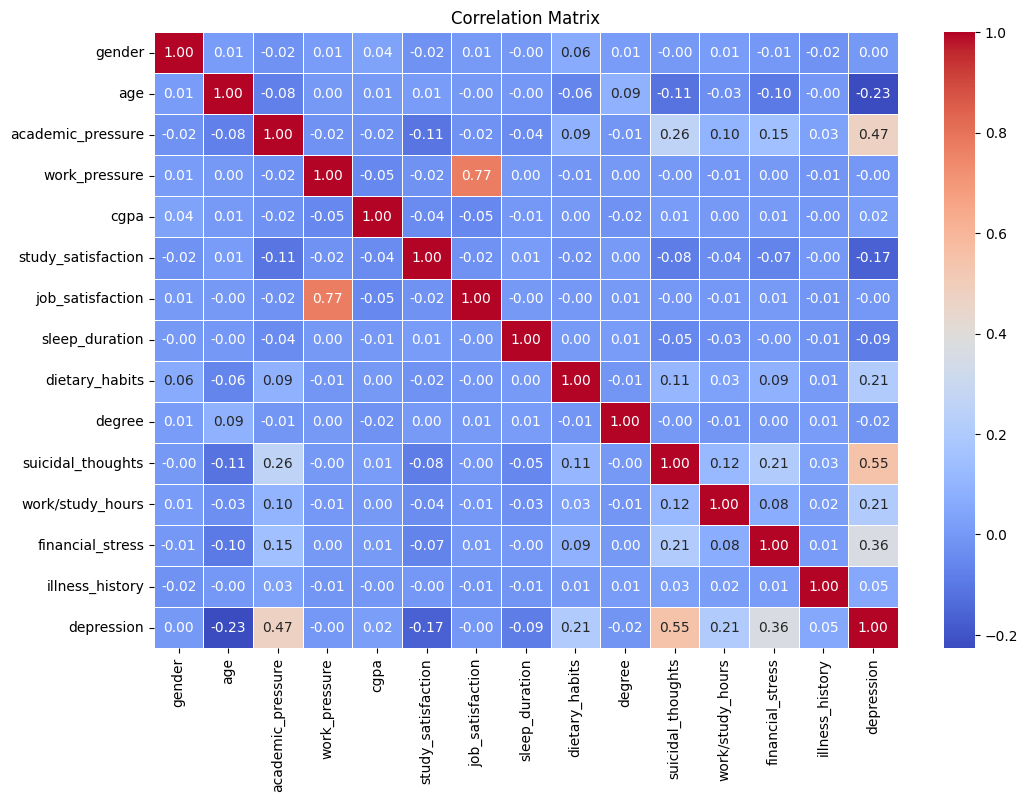

In [36]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [37]:
data = data.drop(columns=['gender', 'work_pressure', 'job_satisfaction'])

print(data.columns)

Index(['age', 'academic_pressure', 'cgpa', 'study_satisfaction',
       'sleep_duration', 'dietary_habits', 'degree', 'suicidal_thoughts',
       'work/study_hours', 'financial_stress', 'illness_history',
       'depression'],
      dtype='object')


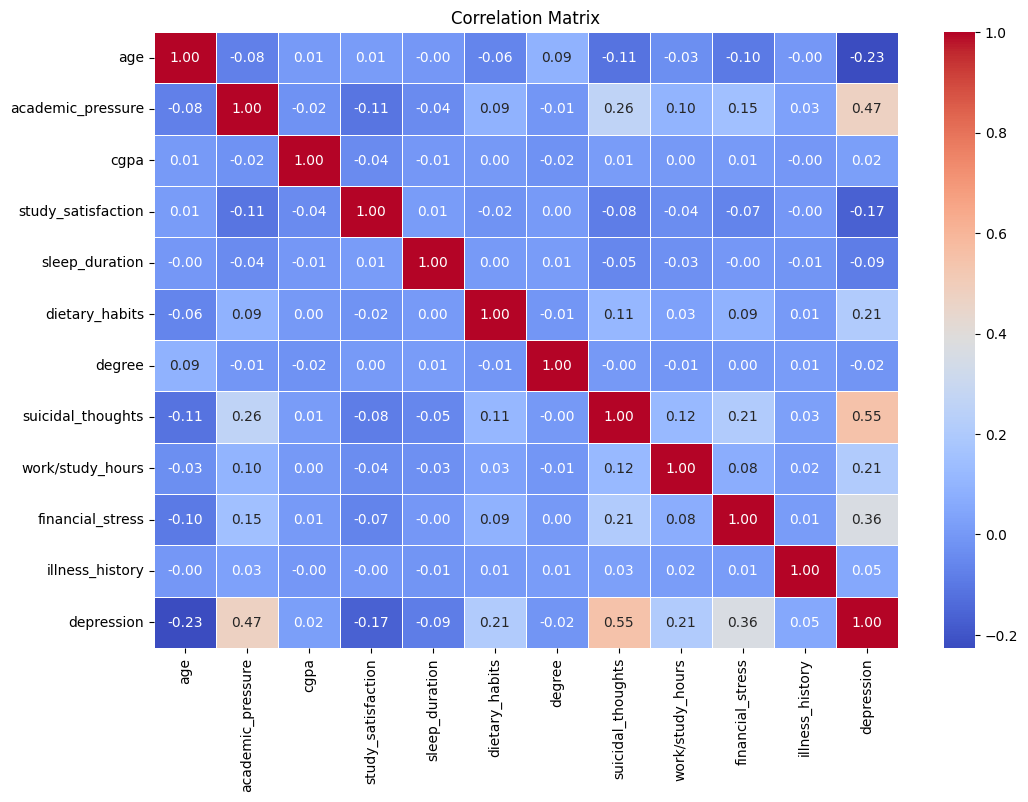

In [38]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [39]:
data['academic_stress_combo'] = data['academic_pressure'] * data['financial_stress']
data['burnout_index'] = data['academic_pressure'] * data['work/study_hours']
data['wellness_score'] = data['study_satisfaction'] + data['sleep_duration'] + data['dietary_habits']


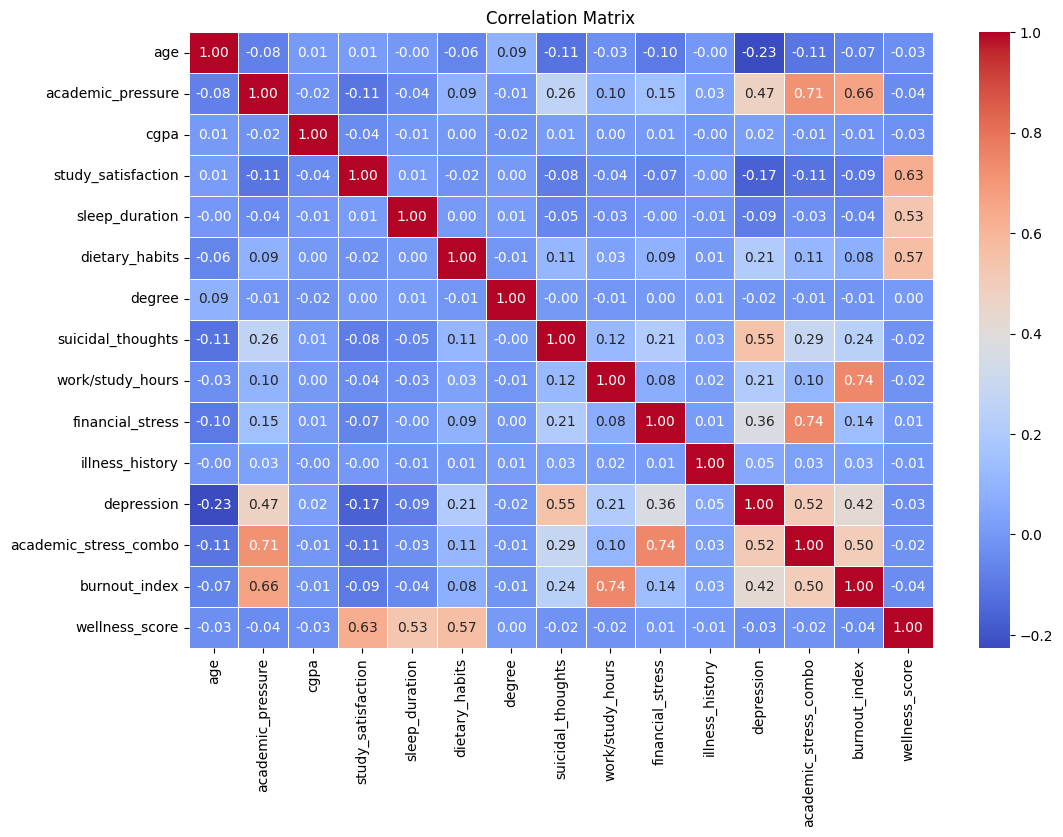

In [40]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Model Training

# Decesion Tree feature selection 

## Spliting data

In [41]:
# Separate features (X) and target (y)
X = data.drop(columns=["depression"])
y = data["depression"]
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest

In [42]:
# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Grid search with cross-validation
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best model
best_rf = grid_rf.best_estimator_
print("Best Random Forest Params:", grid_rf.best_params_)

Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [43]:
# Predictions
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# Metrics
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(f"AUC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")

Random Forest Results:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2343
           1       0.84      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.83      5581

AUC Score: 0.9103


In [44]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

# Alternatively, you can also get it from the classification report
# The 'accuracy' is the last value in the classification report's output

Accuracy: 0.8357


In [45]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_proba_rf)

# Perform cross-validation on best model
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')

# Print all results
print("=== Model Evaluation Metrics ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\n=== Cross-Validation Results ===")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"CV Accuracy Scores: {cv_scores}")
print(f"Standard Deviation: {cv_scores.std():.4f}")
print("\nBest Parameters:", grid_rf.best_params_)

=== Model Evaluation Metrics ===
Accuracy: 0.8357
ROC AUC: 0.9103

=== Cross-Validation Results ===
Mean CV Accuracy: 0.8462
CV Accuracy Scores: [0.85013441 0.84363799 0.84498208 0.84431004 0.84811828]
Standard Deviation: 0.0025

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [46]:
cv_auc_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='roc_auc')
print(f"\nMean CV ROC AUC: {cv_auc_scores.mean():.4f}")
print(f"CV ROC AUC Scores: {cv_auc_scores}")


Mean CV ROC AUC: 0.9200
CV ROC AUC Scores: [0.92517055 0.913412   0.9204687  0.9178818  0.92300136]


## XGBoost

In [47]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score

# Initialize XGBoost model
xgb = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)

# Define hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search with cross-validation
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

# Best model
best_xgb = grid_xgb.best_estimator_
print("Best XGBoost Parameters:", grid_xgb.best_params_)

# Predictions
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_proba_xgb)

# Cross-validation scores
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='accuracy')
cv_auc_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='roc_auc')

# Print all results
print("\n=== XGBoost Evaluation Metrics ===")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

print("\n=== Cross-Validation Results ===")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
print(f"Mean CV ROC AUC: {cv_auc_scores.mean():.4f} (±{cv_auc_scores.std():.4f})")

/home/abdou/anaconda3/envs/ml/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:40:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/abdou/anaconda3/envs/ml/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:40:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/abdou/anaconda3/envs/ml/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:40:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/abdou/anaconda3/envs/ml/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:40:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/abdou/anaconda3/en

Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


/home/abdou/anaconda3/envs/ml/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:41:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/abdou/anaconda3/envs/ml/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:41:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/abdou/anaconda3/envs/ml/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:41:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/abdou/anaconda3/envs/ml/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:41:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/abdou/anaconda3/en


=== XGBoost Evaluation Metrics ===
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

Accuracy: 0.8389
ROC AUC: 0.9140

=== Cross-Validation Results ===
Mean CV Accuracy: 0.8503 (±0.0044)
Mean CV ROC AUC: 0.9230 (±0.0039)


/home/abdou/anaconda3/envs/ml/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:41:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Models that work better with standarization

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Standardize features (fit on training data only to avoid data leakage)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler on test data

## Logistic Regression

In [49]:
# Initialize Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Define hyperparameter grid
param_grid_logreg = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear']  # Works well for small datasets and L1/L2
}

# Grid search with cross-validation
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='roc_auc', n_jobs=-1)
grid_logreg.fit(X_train_scaled, y_train)

# Best model
best_logreg = grid_logreg.best_estimator_
print("Best Logistic Regression Parameters:", grid_logreg.best_params_)

Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [50]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Predictions
y_pred_logreg = best_logreg.predict(X_test_scaled)
y_proba_logreg = best_logreg.predict_proba(X_test_scaled)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred_logreg)
roc_auc = roc_auc_score(y_test, y_proba_logreg)

# Cross-validation scores
cv_scores = cross_val_score(best_logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_auc_scores = cross_val_score(best_logreg, X_train_scaled, y_train, cv=5, scoring='roc_auc')

# Print results
print("\n=== Logistic Regression Evaluation ===")
print(classification_report(y_test, y_pred_logreg))
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\n=== Cross-Validation ===")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
print(f"Mean CV ROC AUC: {cv_auc_scores.mean():.4f} (±{cv_auc_scores.std():.4f})")


=== Logistic Regression Evaluation ===
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

Accuracy: 0.8371
ROC AUC: 0.9136

=== Cross-Validation ===
Mean CV Accuracy: 0.8487 (±0.0028)
Mean CV ROC AUC: 0.9228 (±0.0038)


## Comparison

In [51]:
import pandas as pd

# Collect results for each model
results = {
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'ROC AUC': roc_auc_score(y_test, y_proba_rf),
        'Best Params': grid_rf.best_params_
    },
    'XGBoost': {
        'Accuracy': accuracy_score(y_test, y_pred_xgb),
        'ROC AUC': roc_auc_score(y_test, y_proba_xgb),
        'Best Params': grid_xgb.best_params_
    },
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, y_pred_logreg),
        'ROC AUC': roc_auc_score(y_test, y_proba_logreg),
        'Best Params': grid_logreg.best_params_
    },
}

# Convert to DataFrame and format
results_df = pd.DataFrame(results).T
results_df['Accuracy'] = results_df['Accuracy'].map('{:.4f}'.format)
results_df['ROC AUC'] = results_df['ROC AUC'].map('{:.4f}'.format)
results_df = results_df.sort_values('ROC AUC', ascending=False)

In [52]:
from IPython.display import display, HTML

# Styled table with colored highlighting
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #3399FF' if v else '' for v in is_max]

styled_df = results_df.style.apply(highlight_max, subset=['Accuracy', 'ROC AUC'])
display(styled_df.set_caption("Model Performance Comparison"))


,Accuracy,ROC AUC,Best Params
XGBoost,0.8389,0.9140,"{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}"
Logistic Regression,0.8371,0.9136,"{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}"
Random Forest,0.8357,0.9103,"{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}"


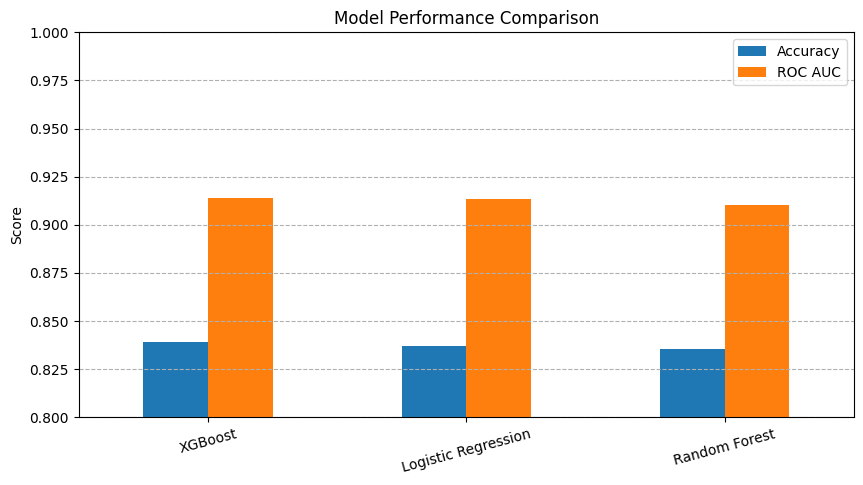

In [53]:
import matplotlib.pyplot as plt

# Plot comparison
results_df[['Accuracy', 'ROC AUC']].astype(float).plot(kind='bar', figsize=(10, 5))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=15)
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--')
plt.show()

### Benchmarking

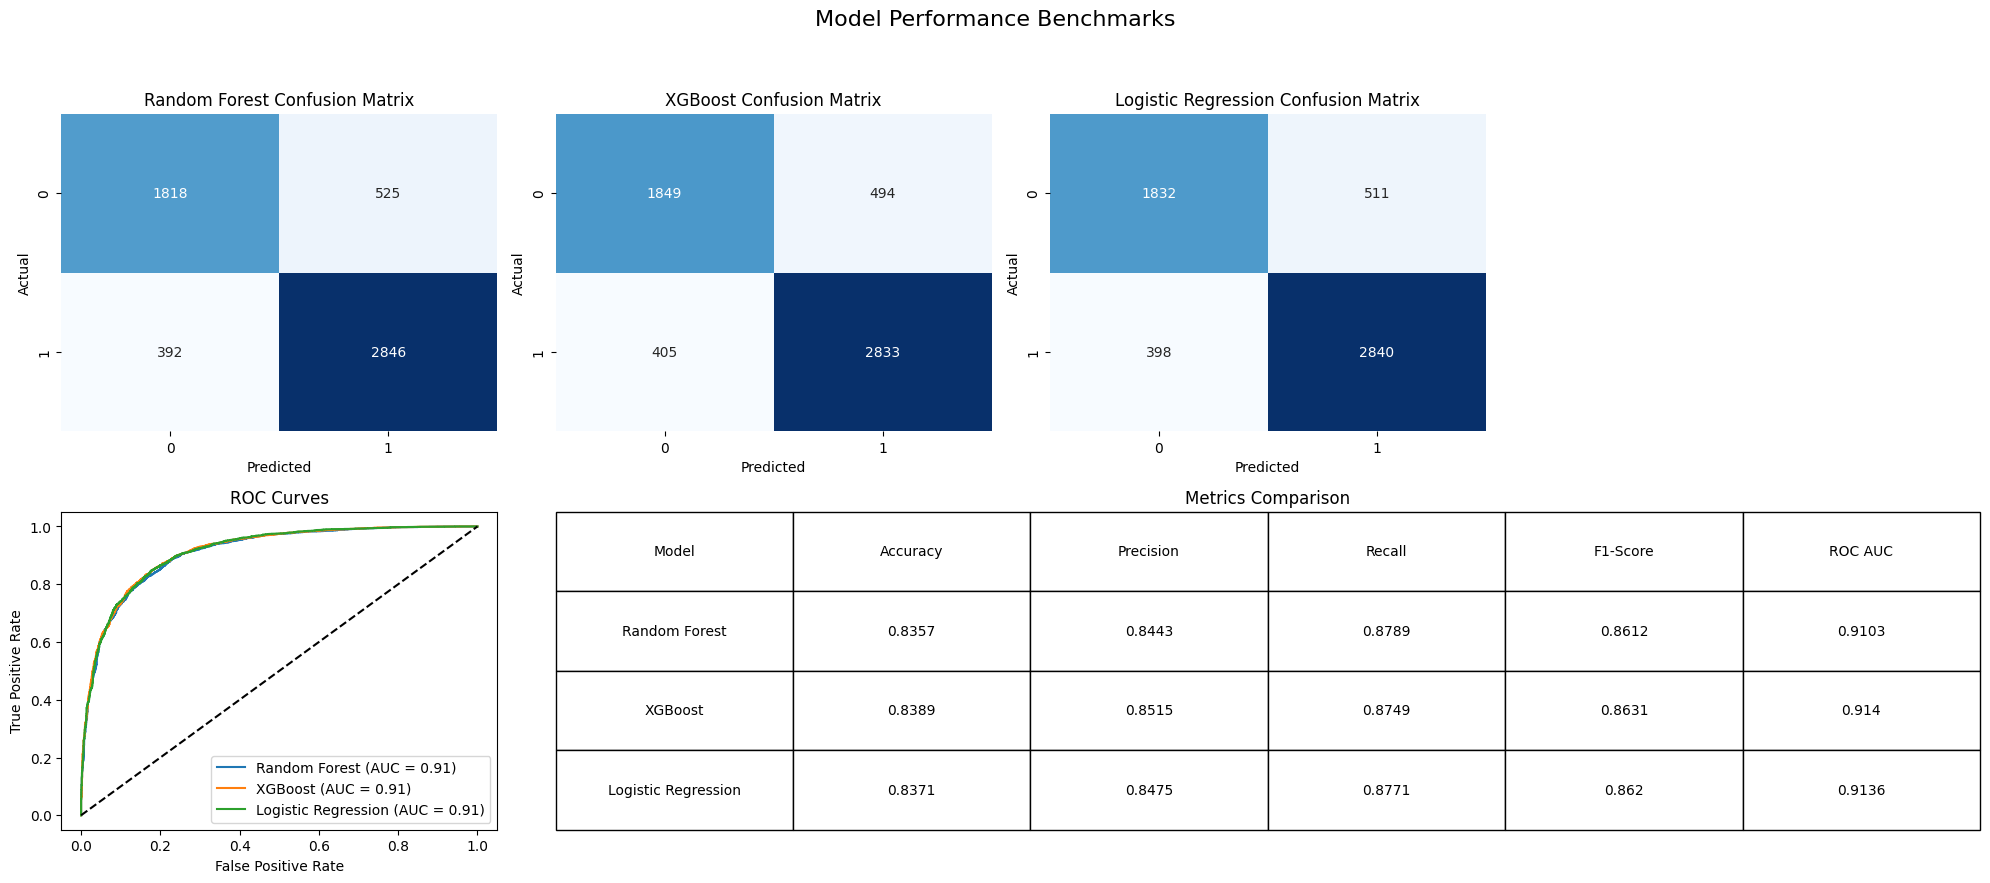

In [54]:
from sklearn.metrics import (confusion_matrix, precision_score, 
                            recall_score, f1_score, roc_curve, auc)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

models = {
    "Random Forest": (y_pred_rf, y_proba_rf),
    "XGBoost": (y_pred_xgb, y_proba_xgb),
    "Logistic Regression": (y_pred_logreg, y_proba_logreg),
}

# Initialize figure
plt.figure(figsize=(20, 16))
plt.suptitle("Model Performance Benchmarks", fontsize=16, y=1.02)

# Plot Confusion Matrices
for i, (name, (y_pred, y_proba)) in enumerate(models.items(), 1):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(4, 4, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

# Plot ROC Curves
plt.subplot(4, 4, 5)
for name, (_, y_proba) in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')

# Metrics Table
metrics_data = []
for name, (y_pred, y_proba) in models.items():
    metrics_data.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_proba)
    ])

metrics_df = pd.DataFrame(
    metrics_data,
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
)

plt.subplot(4, 4, (6, 8))
plt.axis('off')
plt.table(
    cellText=metrics_df.round(4).values,
    colLabels=metrics_df.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)
plt.title("Metrics Comparison")

plt.tight_layout()
plt.show()

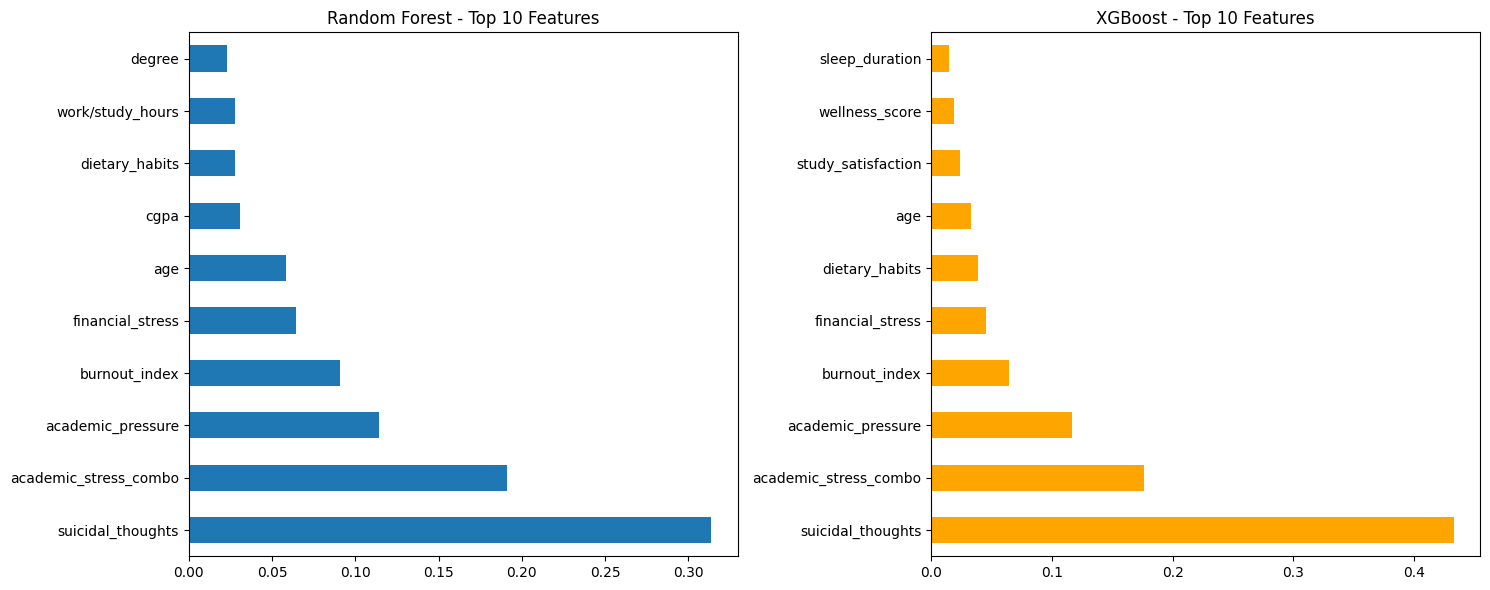

In [55]:
# Feature Importance Plot (Random Forest vs XGBoost)
plt.figure(figsize=(15, 6))

# Random Forest
plt.subplot(1, 2, 1)
rf_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
rf_importances.nlargest(10).plot(kind='barh')
plt.title('Random Forest - Top 10 Features')

# XGBoost
plt.subplot(1, 2, 2)
xgb_importances = pd.Series(best_xgb.feature_importances_, index=X.columns)
xgb_importances.nlargest(10).plot(kind='barh', color='orange')
plt.title('XGBoost - Top 10 Features')

plt.tight_layout()
plt.show()

# Save Models

In [56]:
# Import necessary module
import joblib
import os

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Sauvegarder les modèles
joblib.dump(best_rf, '../models/random_forest.pkl')
joblib.dump(best_xgb, '../models/xgboost.pkl')
joblib.dump(best_logreg, '../models/logistic_regression.pkl')

print("Les modèles ont été entraînés et sauvegardés dans le dossier '../models'.")

Les modèles ont été entraînés et sauvegardés dans le dossier '../models'.
